In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
plt.style.use(['dark_background'])
plt.suptitle('figure title', color='w')

Text(0.5, 0.98, 'figure title')

<Figure size 576x360 with 0 Axes>

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
df = pd.read_csv('DATA/forProcessing.csv')
df_a = df.dropna()
X = df_a.drop('receive_pressure', axis = 1)
y = df_a['receive_pressure']

In [6]:
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = {'l2', 'l1'}
params['sub_feature'] = 0.8
params['num_leaves'] = 20
params['min_data'] = 3
params['max_depth'] = 15
params['feature_fraction'] = .99
params['bagging_fraction'] = .99
params['bagging_freq'] = 3

### Creating dataframe for storing mean absolute error in percents

In [7]:
df_error = pd.DataFrame(columns=['MAPE'])

### Iterating LGBM through different data test size using 5% step

In [8]:
sc = StandardScaler()
MAPE = []
i=0.05
while i < 1:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    d_train = lgb.Dataset(x_train, label=y_train)
    gbm = lgb.train(params, d_train, 10000)
    y_pred=gbm.predict(x_test, num_iteration=gbm.best_iteration)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    print('The RMSE is:', mean_squared_error(y_test, y_pred), " and the MAE is: ", mean_absolute_error(y_test, y_pred))
    print("The MAPE is: ", MAPE)
    df_error.loc[i] = [MAPE]
    i = i + 0.05  

The RMSE is: 13.433975502027549  and the MAE is:  2.4408030480774627
The MAPE is:  10.327809972541068
The RMSE is: 20.996314872823287  and the MAE is:  2.473657974851791
The MAPE is:  10.309467876974514
The RMSE is: 29.406155316910404  and the MAE is:  2.55871862186559
The MAPE is:  10.083410926649087
The RMSE is: 29.85559539453296  and the MAE is:  2.660454100786819
The MAPE is:  10.679604006364738
The RMSE is: 31.27152978854876  and the MAE is:  2.660755195243423
The MAPE is:  10.124580207549286
The RMSE is: 35.376736884213024  and the MAE is:  2.7369127966018
The MAPE is:  10.195052332743119
The RMSE is: 58.534873090359696  and the MAE is:  2.8161275498269056
The MAPE is:  10.342767541770737
The RMSE is: 54.00673289063381  and the MAE is:  2.821087132938153
The MAPE is:  10.379746331424625
The RMSE is: 51.995195077667425  and the MAE is:  2.8323586791971276
The MAPE is:  10.316893424418302
The RMSE is: 50.18332390393581  and the MAE is:  2.82078326413884
The MAPE is:  10.63542322721

### Drawing

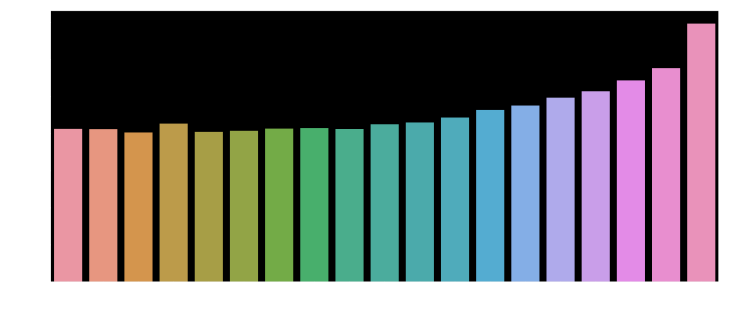

In [9]:
plt.figure(figsize=(12,5))
ax = sns.barplot(df_error.index, df_error.MAPE)
ax.set_xlabel('Test size')
ax.set_ylabel('Mean absolute error')
ax.set_xticklabels(np.round(df_error.index, 2), rotation='vertical', fontsize=10)
plt.show()